## 2. Basic Plotting using MatPlotLib

In this exercise, we will be plotting experimental data in Python using 'matplotlib'. (Explain what the purpose is of this exercise, why you will want this as an alternative to excel plots, and what some of the advantages are of using this method.)

# Exercise Outline
* Single line plot with annotation
* Multiple lines in one plot, using different styles and adding a legend
* Plot mean with sd as error bars
* Plot bar chart with mean and sd
* Save/export plot

First we need to import some libraries to setup the script

In [1]:
%pylab inline
import csv
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Next we have to import our data into the notebook. Our data is in a Comma Separated Values (.csv) file, we import the values into lists to use in our script. Next the values are loaded into a list. And to test that it worked, we print the list out to see the results.

In [2]:
with open('datafiles/labresults.csv', 'r') as file:
    reader = csv.reader(file)
    header_line = next(reader) #store the header into a separate file
    results_list = list(reader)
    print(results_list)

[['compound1', ' 10', ' 14'], ['compound2', ' 20', ' 570'], ['compound3', ' 30', ' 1302'], ['compound4', ' 40', ' 2838'], ['compound5', ' 50', ' 4212'], ['compound6', ' 60', ' 4590']]


We now have a list of tuples that contain the values for each measurement. There are three entries (or columns) in each tuple, and we want to create a graph based on this data. First define the x and the y axis. We can load this in the x and y from 'Results_list', but we do need to do some looping for that

In [3]:
x_results = []
y_results = []
for entries in results_list:
    x_results.append(int(entries[1]))
    y_results.append(int(entries[2]))

print(x_results)
print(y_results)

[' 10', ' 20', ' 30', ' 40', ' 50', ' 60']
[' 14', ' 570', ' 1302', ' 2838', ' 4212', ' 4590']


Now that we have the x and y points that need to be plotted, we can create the figure, create the axes and finally label them.

[(0, 5000),
 Text(0,0.5,'Counts'),
 Text(0.5,0,'Concentration'),
 Text(0.5,1,'Labresults plot')]

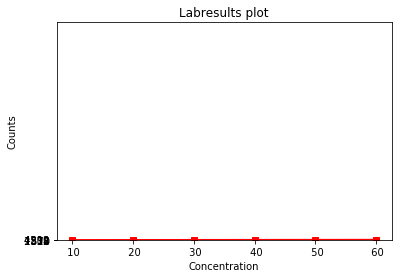

In [4]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.set_ylim(bottom=0, top=5000, auto=True)
ax.plot(x_results,y_results,'-sr') 
ax.set(title='Labresults plot',xlabel='Concentration',ylabel='Counts', ylim=[0,5000])